link to tableau public:
https://public.tableau.com/views/autompg_data/cylinders?:language=en-US&:display_count=n&:origin=viz_share_link

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path=r"C:\Users\Efat\Desktop\seneca\semester5\BDM500\project\project_data.xlsx"
data=pd.read_excel(path, sheet_name="auto-mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   modelyear     398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


why horsepower is an object? let's convert it to float.

In [4]:
#data.horsepower=data.horsepower.astype('float')
#ValueError: could not convert string to float: '?'

In [5]:
data[data.horsepower=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [6]:
data.horsepower=data.horsepower.replace('?', np.nan)
data.horsepower=data.horsepower.astype('float')
data.horsepower.dtype

dtype('float64')

In [7]:
data['horsepower']=data.groupby(['cylinders'])['horsepower'].apply(lambda col:  col.fillna(col.mean())) 
#data['horsepower']
data.horsepower.isnull().sum()

0

## looking at data:

In [8]:
data.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

<AxesSubplot:>

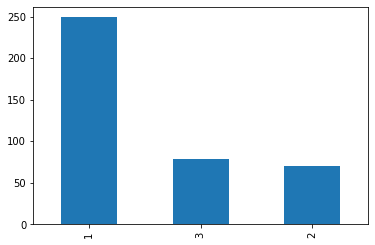

In [9]:
data.origin.value_counts().plot(kind='bar')

In [10]:
data.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

<AxesSubplot:>

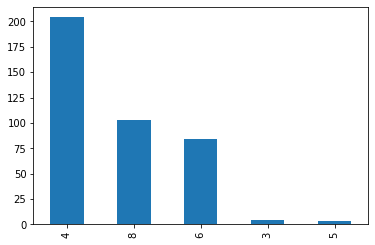

In [11]:
data.cylinders.value_counts().plot(kind='bar')

now we can get statistics of data.

In [12]:
data[['mpg','displacement','horsepower','weight','acceleration']].describe()

,mpg,displacement,horsepower,weight,acceleration
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,104.132947,2970.424623,15.568090
std,7.815984,104.269838,38.310886,846.841774,2.757689
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,104.250000,76.000000,2223.750000,13.825000
50%,23.000000,148.500000,92.000000,2803.500000,15.500000
75%,29.000000,262.000000,125.000000,3608.000000,17.175000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


maximum mpg: 46.6

minimum mpg: 9

The mpg KPI would be 46.

## target variable

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

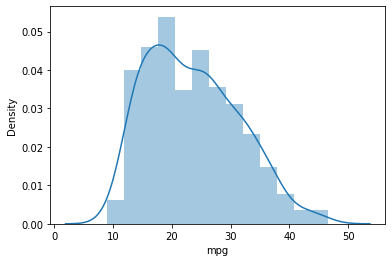

In [13]:
#data.mpg.plot.density()
sns.distplot(data.mpg)

the distribution of the target variable is not normal.

### scaling the data continous variables

In [14]:
from sklearn.preprocessing import StandardScaler

cont_cols=['mpg','displacement','horsepower','weight','acceleration']
disc_cols=['cylinders', 'modelyear', 'origin', 'name']
scaler=StandardScaler()
data_scaled= pd.DataFrame(scaler.fit_transform(data[cont_cols]), columns=cont_cols)
data_scaled[disc_cols]= data[disc_cols]
data_scaled

,mpg,displacement,horsepower,weight,acceleration,cylinders,modelyear,origin,name
0,-0.706439,1.090604,0.676038,0.630870,-1.295498,8,70,1,chevrolet chevelle malibu
1,-1.090751,1.503514,1.590766,0.854333,-1.477038,8,70,1,buick skylark 320
2,-0.706439,1.196232,1.198740,0.550470,-1.658577,8,70,1,plymouth satellite
3,-0.962647,1.061796,1.198740,0.546923,-1.295498,8,70,1,amc rebel sst
4,-0.834543,1.042591,0.937389,0.565841,-1.840117,8,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,0.446497,-0.513026,-0.473906,-0.213324,0.011586,4,82,1,ford mustang gl
394,2.624265,-0.925936,-1.362500,-0.993671,3.279296,4,82,2,vw pickup
395,1.087017,-0.561039,-0.526177,-0.798585,-1.440730,4,82,1,dodge rampage
396,0.574601,-0.705077,-0.656852,-0.408411,1.100822,4,82,1,ford ranger


### replace the country origin code by the country names

In [15]:
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data_scaled['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data_scaled.head()

,mpg,displacement,horsepower,weight,acceleration,cylinders,modelyear,origin,name,Country_code
0,-0.706439,1.090604,0.676038,0.630870,-1.295498,8,70,1,chevrolet chevelle malibu,USA
1,-1.090751,1.503514,1.590766,0.854333,-1.477038,8,70,1,buick skylark 320,USA
2,-0.706439,1.196232,1.198740,0.550470,-1.658577,8,70,1,plymouth satellite,USA
3,-0.962647,1.061796,1.198740,0.546923,-1.295498,8,70,1,amc rebel sst,USA
4,-0.834543,1.042591,0.937389,0.565841,-1.840117,8,70,1,ford torino,USA


## Discrete variables

### country

In [16]:
data.Country_code.value_counts()

USA       249
Japan      79
Europe     70
Name: Country_code, dtype: int64

<AxesSubplot:>

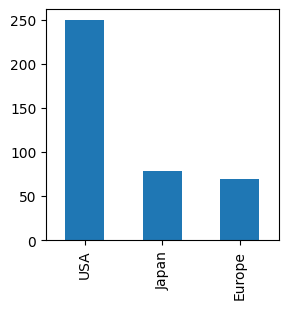

In [115]:
plt.figure(figsize=(3,3))
data.Country_code.value_counts().plot(kind='bar')

In [17]:
data.groupby(['Country_code']).mpg.mean()

Country_code
Europe    27.891429
Japan     30.450633
USA       20.083534
Name: mpg, dtype: float64

<AxesSubplot:xlabel='Country_code'>

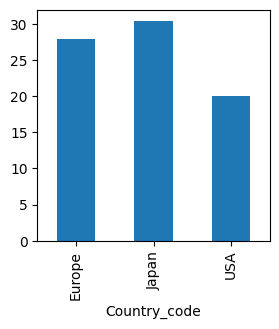

In [117]:
plt.figure(figsize=(3,3))
data.groupby(['Country_code']).mpg.mean().plot(kind='bar')

the average mpg for Japan is more than this amount for Europe and USA.

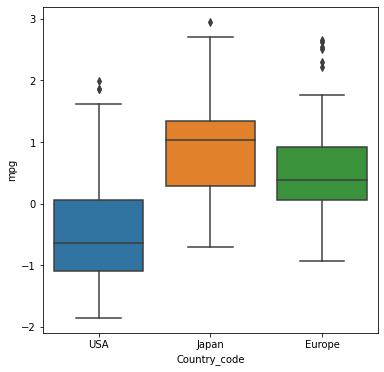

In [19]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x="Country_code", y="mpg", data=data_scaled)

### model year

<AxesSubplot:>

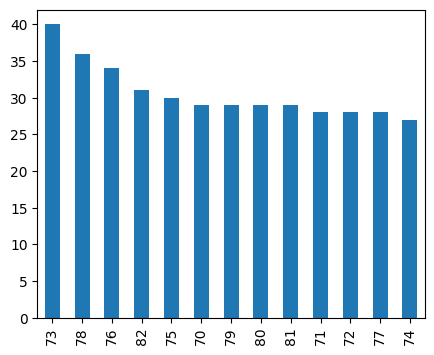

In [122]:
plt.figure(figsize=(5,4))
data.modelyear.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='modelyear'>

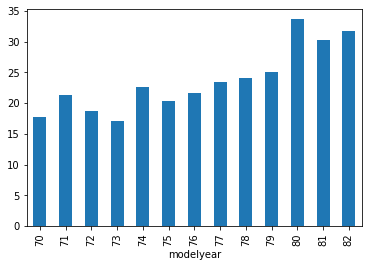

In [20]:
data.groupby(['modelyear']).mpg.mean().plot(kind='bar')

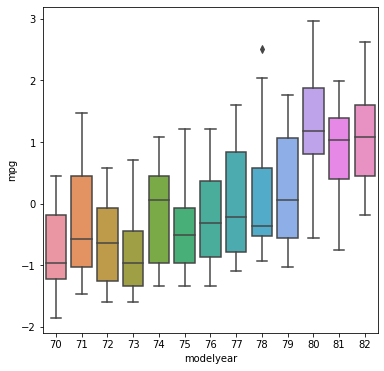

In [21]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x="modelyear", y="mpg", data=data_scaled)

### cylinders

In [22]:
data.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

<AxesSubplot:>

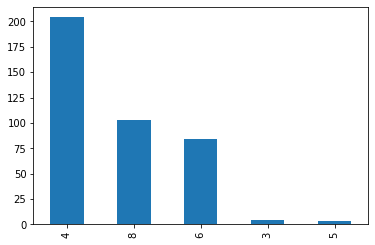

In [23]:
data.cylinders.value_counts().plot(kind="bar")

<AxesSubplot:xlabel='cylinders'>

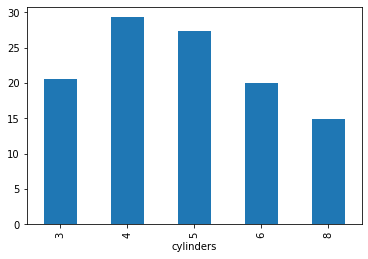

In [24]:
data.groupby(['cylinders']).mpg.mean().plot(kind='bar')

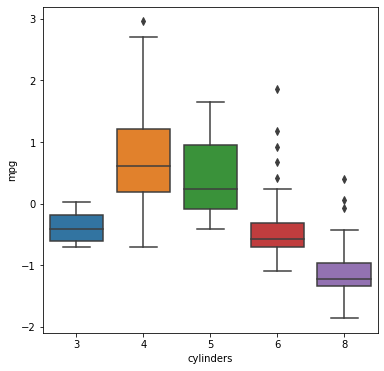

In [25]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x="cylinders", y="mpg", data=data_scaled)

## Continuous variables

In [26]:
data_scaled[cont_cols].corr()

,mpg,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.804203,-0.775608,-0.831741,0.420289
displacement,-0.804203,1.000000,0.897520,0.932824,-0.543684
horsepower,-0.775608,0.897520,1.000000,0.863600,-0.688022
weight,-0.831741,0.932824,0.863600,1.000000,-0.417457
acceleration,0.420289,-0.543684,-0.688022,-0.417457,1.000000


<AxesSubplot:>

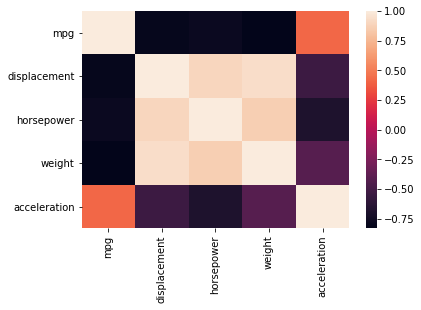

In [27]:
sns.heatmap(data_scaled[cont_cols].corr())  

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='horsepower', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='displacement'>,
        <AxesSubplot:xlabel='displacement', ylabel='displacement'>,
        <AxesSubplot:xlabel='horsepower', ylabel='displacement'>,
        <AxesSubplot:xlabel='weight', ylabel='displacement'>,
        <AxesSubplot:xlabel='acceleration', ylabel='displacement'>],
       [<AxesSubplot:xlabel='mpg', ylabel='horsepower'>,
        <AxesSubplot:xlabel='displacement', ylabel='horsepower'>,
        <AxesSubplot:xlabel='horsepower', ylabel='horsepower'>,
        <AxesSubplot:xlabel='weight', ylabel='horsepower'>,
        <AxesSubplot:xlabel='acceleration', ylabel='horsepower'>],
       [<AxesSubplot:xlabel='mpg', ylabel='weight'>,
        <AxesSubplot:xlabel='d

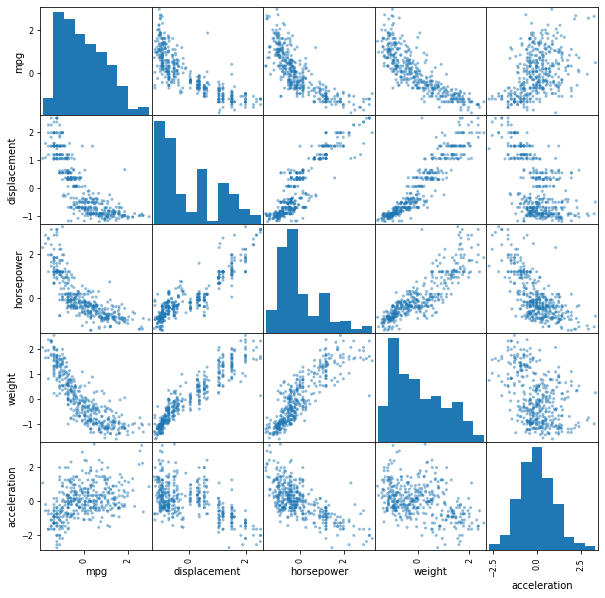

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_scaled[cont_cols], figsize=(10,10))

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


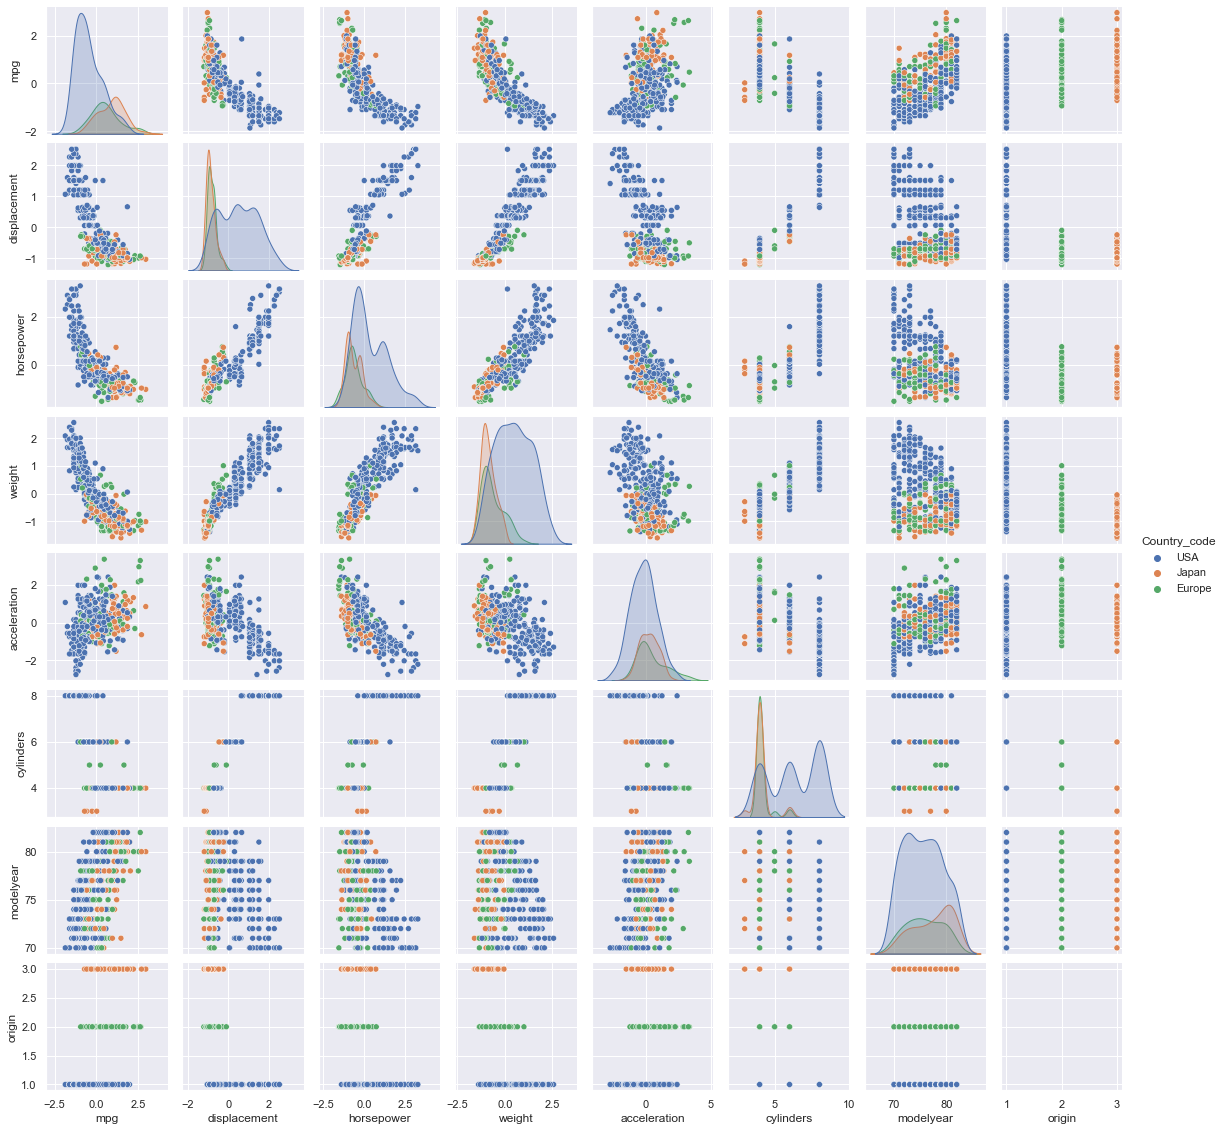

In [29]:
#scatterplot
sns.set()
sns.pairplot(data_scaled, height = 2.0,hue ='Country_code')
plt.show()

### name

In [30]:
data.name

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 398, dtype: object

**extracting company name out of the names**

In [31]:
data['company']=data.name.str.extract('(^.*?)\s')
data_scaled['company']=data.name.str.extract('(^.*?)\s')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name,Country_code,company
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,USA,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,USA,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,USA,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,USA,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,USA,ford


In [32]:
# export data to a csv file to be used in tableau
path=r"C:\Users\Efat\Desktop\seneca\semester5\BDM500\project\data.xlsx"
data.to_excel(path)

<AxesSubplot:>

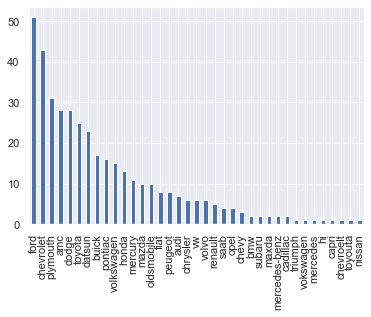

In [33]:
data.company.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='company'>

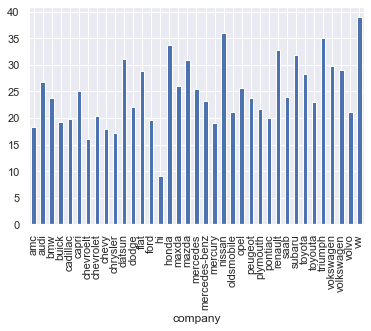

In [34]:
data.groupby(['company']).mpg.mean().plot(kind='bar')

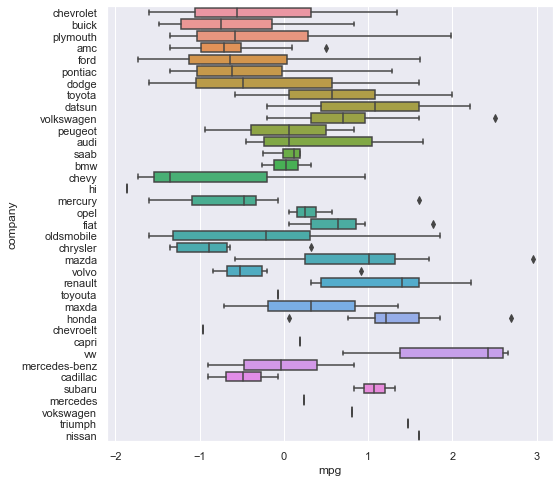

In [35]:
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(y="company", x="mpg", data=data_scaled)

## variables normality and skewness

In [36]:
data.skew(axis='index', numeric_only=True)

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.108433
weight          0.531063
acceleration    0.278777
modelyear       0.011535
origin          0.923776
dtype: float64

## displacement

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='displacement', ylabel='Density'>

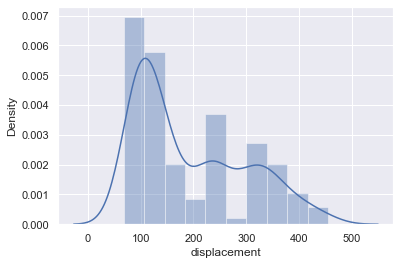

In [37]:
sns.distplot(data.displacement)

C:\Users\Efat\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Efat\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Efat\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


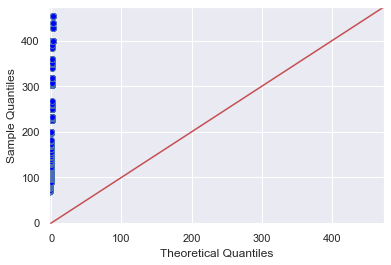

In [38]:
import statsmodels.api as sm
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(data.displacement, line='45')


<AxesSubplot:>

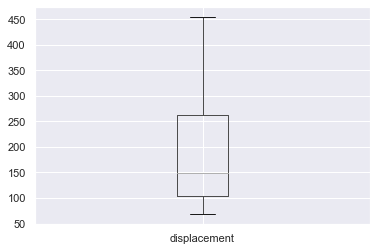

In [39]:
data.boxplot(column='displacement')

## horsepower

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

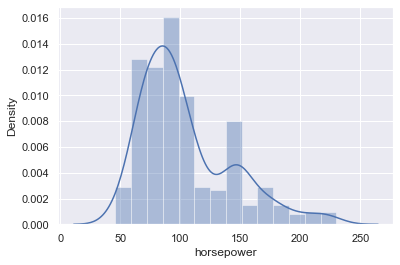

In [40]:
sns.distplot(data.horsepower)

C:\Users\Efat\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


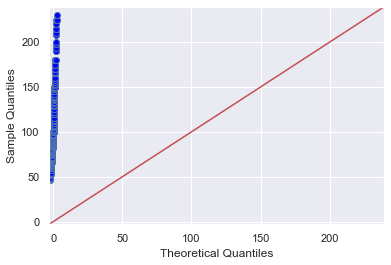

In [41]:
fig = sm.qqplot(data.horsepower, line='45')

<AxesSubplot:>

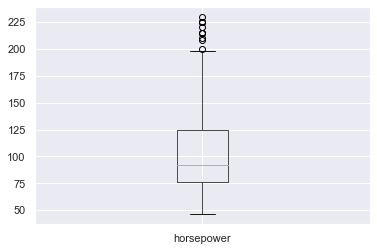

In [42]:
data.boxplot(column='horsepower')

## weight

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

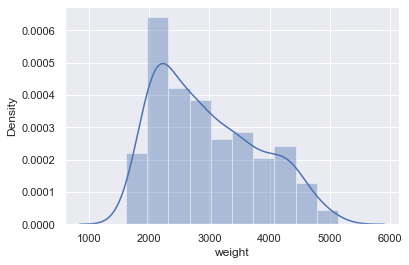

In [43]:
sns.distplot(data.weight)

C:\Users\Efat\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


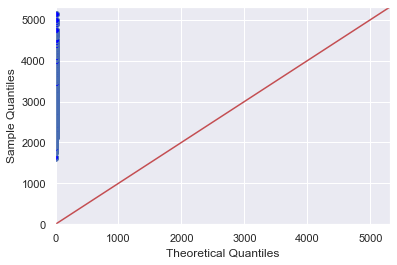

In [44]:
fig = sm.qqplot(data.weight, line='45')

<AxesSubplot:>

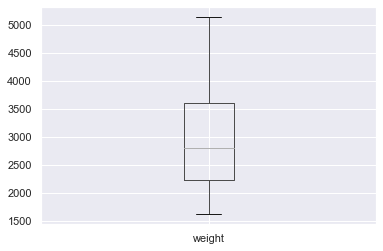

In [45]:
data.boxplot(column='weight')

## acceleration

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='acceleration', ylabel='Density'>

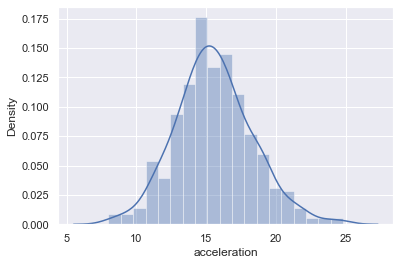

In [46]:
sns.distplot(data.acceleration)

C:\Users\Efat\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


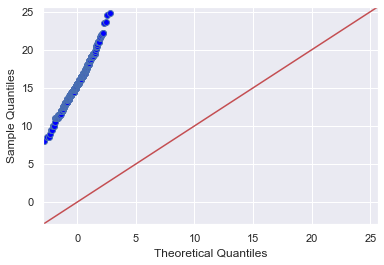

In [47]:
fig = sm.qqplot(data.acceleration, line='45')

<AxesSubplot:>

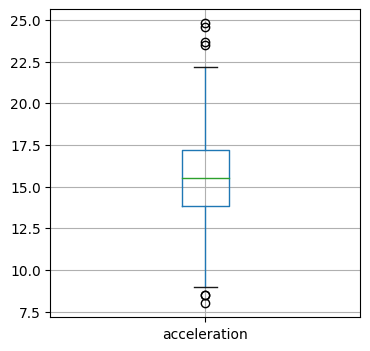

In [125]:
plt.figure(figsize=(4,4))
data.boxplot(column='acceleration')

# data balance for categorical variables:

In [49]:
data.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [50]:
data.modelyear.value_counts()

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: modelyear, dtype: int64

In [51]:
data.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [52]:
data.Country_code.value_counts()

USA       249
Japan      79
Europe     70
Name: Country_code, dtype: int64

In [53]:
data.company.value_counts()

ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
opel              4
chevy             3
bmw               2
subaru            2
maxda             2
mercedes-benz     2
cadillac          2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: company, dtype: int64

# scaled variables:

## standard Scaler

In [54]:
data_scaled.skew()

<ipython-input-54-59ee3b9e4846>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_scaled.skew()


mpg             0.457066
displacement    0.719645
horsepower      1.108433
weight          0.531063
acceleration    0.278777
cylinders       0.526922
modelyear       0.011535
origin          0.923776
dtype: float64

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='displacement', ylabel='Density'>

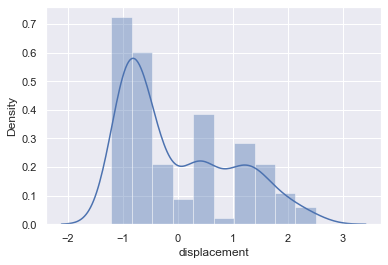

In [55]:
sns.distplot(data_scaled.displacement)

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

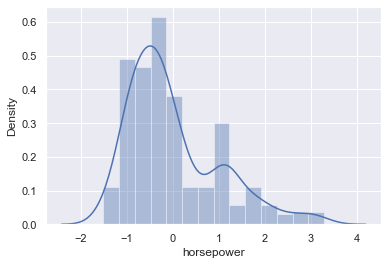

In [56]:
sns.distplot(data_scaled.horsepower)

## MinMaxScaler

In [57]:
from sklearn.preprocessing import MinMaxScaler

cont_cols=['mpg','displacement','horsepower','weight','acceleration']
disc_cols=['cylinders', 'modelyear', 'origin', 'name']
scaler2=MinMaxScaler()
data_scaled2= pd.DataFrame(scaler2.fit_transform(data[cont_cols]), columns=cont_cols)
data_scaled2[disc_cols]= data[disc_cols]
data_scaled2

,mpg,displacement,horsepower,weight,acceleration,cylinders,modelyear,origin,name
0,0.239362,0.617571,0.456522,0.536150,0.238095,8,70,1,chevrolet chevelle malibu
1,0.159574,0.728682,0.646739,0.589736,0.208333,8,70,1,buick skylark 320
2,0.239362,0.645995,0.565217,0.516870,0.178571,8,70,1,plymouth satellite
3,0.186170,0.609819,0.565217,0.516019,0.238095,8,70,1,amc rebel sst
4,0.212766,0.604651,0.510870,0.520556,0.148810,8,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,0.478723,0.186047,0.217391,0.333711,0.452381,4,82,1,ford mustang gl
394,0.930851,0.074935,0.032609,0.146583,0.988095,4,82,2,vw pickup
395,0.611702,0.173127,0.206522,0.193365,0.214286,4,82,1,dodge rampage
396,0.505319,0.134367,0.179348,0.286929,0.630952,4,82,1,ford ranger


In [58]:
data_scaled2.skew()

<ipython-input-58-12bae97a115e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_scaled2.skew()


mpg             0.457066
displacement    0.719645
horsepower      1.108433
weight          0.531063
acceleration    0.278777
cylinders       0.526922
modelyear       0.011535
origin          0.923776
dtype: float64

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

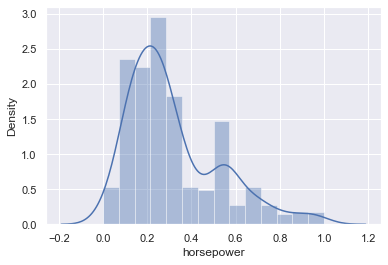

In [59]:
sns.distplot(data_scaled2.horsepower)

## power transformer

In [60]:
from sklearn.preprocessing import PowerTransformer
transformer=PowerTransformer(method='box-cox')
cont_cols=['mpg','displacement','horsepower','weight','acceleration']
disc_cols=['cylinders', 'modelyear', 'origin', 'name']
data_transform= pd.DataFrame(transformer.fit_transform(data[cont_cols]), columns=cont_cols)
data_transform[disc_cols]= data[disc_cols]
data_transform

,mpg,displacement,horsepower,weight,acceleration,cylinders,modelyear,origin,name
0,-0.644123,1.129531,0.867926,0.754909,-1.326725,8,70,1,chevrolet chevelle malibu
1,-1.151646,1.332509,1.454112,0.929327,-1.531246,8,70,1,buick skylark 320
2,-0.644123,1.184848,1.227746,0.689075,-1.739629,8,70,1,plymouth satellite
3,-0.974076,1.113994,1.227746,0.686130,-1.326725,8,70,1,amc rebel sst
4,-0.805202,1.103524,1.057335,0.701794,-1.952127,8,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,0.552214,-0.273487,-0.320302,-0.037226,0.049790,4,82,1,ford mustang gl
394,2.126161,-1.054660,-2.122381,-1.055088,2.987455,4,82,2,vw pickup
395,1.082673,-0.347037,-0.395286,-0.764704,-1.490041,4,82,1,dodge rampage
396,0.664270,-0.590966,-0.594862,-0.259330,1.094844,4,82,1,ford ranger


C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='displacement', ylabel='Density'>

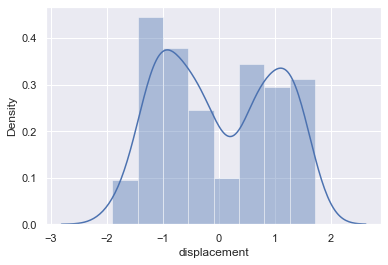

In [61]:
sns.distplot(data_transform.displacement)

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

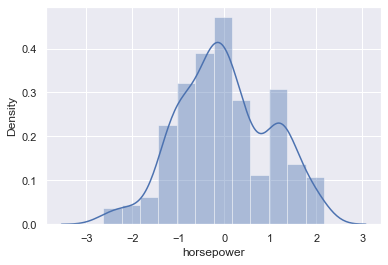

In [62]:
sns.distplot(data_transform.horsepower)

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

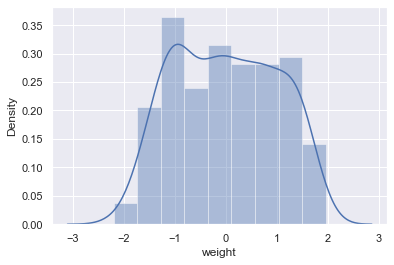

In [63]:
sns.distplot(data_transform.weight)

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='acceleration', ylabel='Density'>

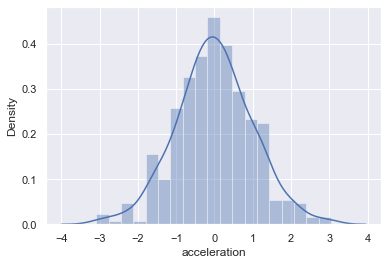

In [64]:
sns.distplot(data_transform.acceleration)

In [65]:
data_transform.skew()

<ipython-input-65-09dbaad49182>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_transform.skew()


mpg            -0.018752
displacement    0.075862
horsepower      0.026604
weight          0.034144
acceleration    0.011416
cylinders       0.526922
modelyear       0.011535
origin          0.923776
dtype: float64

## log trasformation

In [66]:
cont_cols=['mpg','displacement','horsepower','weight','acceleration']
disc_cols=['cylinders', 'modelyear', 'origin', 'name']
data_log= pd.DataFrame(data[cont_cols].apply(lambda x: np.log10(x)))
data_log[disc_cols]= data[disc_cols]
data_log

,mpg,displacement,horsepower,weight,acceleration,cylinders,modelyear,origin,name
0,1.255273,2.487138,2.113943,3.544564,1.079181,8,70,1,chevrolet chevelle malibu
1,1.176091,2.544068,2.217484,3.567379,1.060698,8,70,1,buick skylark 320
2,1.255273,2.502427,2.176091,3.536053,1.041393,8,70,1,plymouth satellite
3,1.204120,2.482874,2.176091,3.535674,1.079181,8,70,1,amc rebel sst
4,1.230449,2.480007,2.146128,3.537693,1.021189,8,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,1.431364,2.146128,1.934498,3.445604,1.193125,4,82,1,ford mustang gl
394,1.643453,1.986772,1.716003,3.328380,1.390935,4,82,2,vw pickup
395,1.505150,2.130334,1.924279,3.360783,1.064458,4,82,1,dodge rampage
396,1.447158,2.079181,1.897627,3.419129,1.269513,4,82,1,ford ranger


In [67]:
data_log.skew()

<ipython-input-67-b724e572b04e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_log.skew()


mpg            -0.136494
displacement    0.226003
horsepower      0.390630
weight          0.156304
acceleration   -0.359504
cylinders       0.526922
modelyear       0.011535
origin          0.923776
dtype: float64

# Model Fitting

### linear regression

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


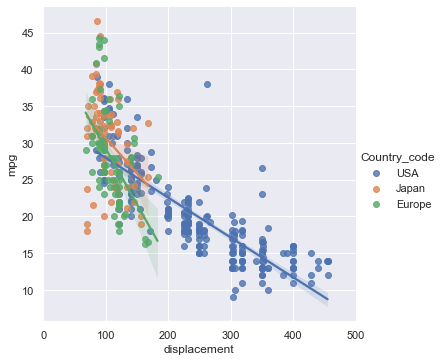

In [68]:
plot=sns.lmplot('displacement','mpg',data=data,hue='Country_code')
plot.set(xlim=(0,500))

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


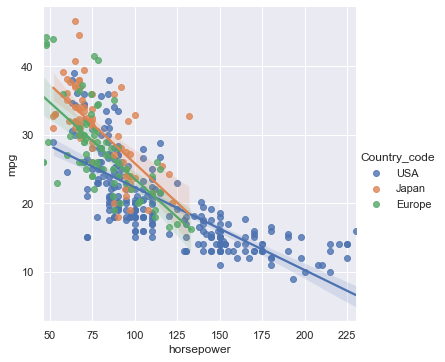

In [69]:
plot=sns.lmplot('horsepower','mpg',data=data,hue='Country_code')

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


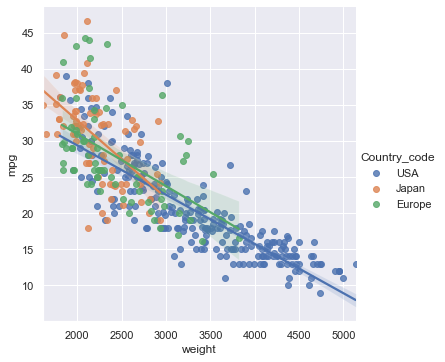

In [70]:
plot=sns.lmplot('weight','mpg',data=data,hue='Country_code')

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


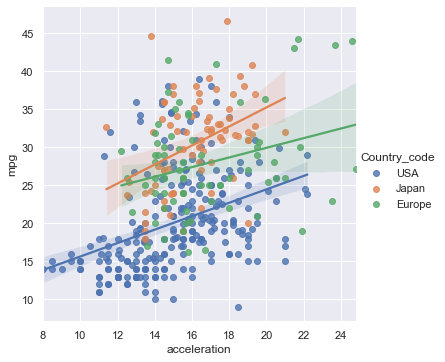

In [71]:
plot=sns.lmplot('acceleration','mpg',data=data,hue='Country_code')

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X,y=data[['cylinders','displacement','horsepower','acceleration','weight','origin','modelyear']], data['mpg']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.2,random_state=0)
print(len(X_train))
print(len(X_test))

318
80


In [73]:
model1=Pipeline([('transform',PowerTransformer(method='box-cox')),
                 ('lm',LinearRegression())])
model1.fit(X_train, y_train)             

Pipeline(steps=[('transform', PowerTransformer(method='box-cox')),
                ('lm', LinearRegression())])

In [74]:
from sklearn.metrics import mean_squared_error
from math import sqrt

model1_rmse= np.sqrt(mean_squared_error(y_train, model1.predict(X_train)))
model1_rmse

2.966650233790873

#### looking at some predictions of linear regression:

In [75]:
print("some data:        ", list(y_train[:10]))
print("some_predictions: ", model1.predict(X_train[:10]))

some data:         [15.0, 27.0, 34.3, 26.0, 31.6, 33.8, 29.0, 18.1, 27.2, 38.0]
some_predictions:  [12.98098958 29.07481603 31.97432553 31.96642902 30.27150494 33.30398121
 29.25398023 20.37846519 25.11110653 34.58523296]


### polynomial regression

In [76]:
from sklearn.preprocessing import PolynomialFeatures
model2=Pipeline([('transform', PowerTransformer(method='box-cox')),
                ('poly', PolynomialFeatures(degree=3)),
                ('lm',LinearRegression())])
model2.fit(X_train, y_train)

Pipeline(steps=[('transform', PowerTransformer(method='box-cox')),
                ('poly', PolynomialFeatures(degree=3)),
                ('lm', LinearRegression())])

In [77]:
model2_rmse= np.sqrt(mean_squared_error(y_train, model2.predict(X_train)))
model2_rmse

1.7214935596510121

In [78]:
print("some data:        ", list(y_train[:10]))
print("some_predictions: ", model2.predict(X_train[:10]))

some data:         [15.0, 27.0, 34.3, 26.0, 31.6, 33.8, 29.0, 18.1, 27.2, 38.0]
some_predictions:  [14.30883789 27.89953613 33.46862793 27.96203613 31.2746582  33.92858887
 27.34509277 19.04968262 26.06604004 35.65515137]


### regression tree

In [79]:
from sklearn.tree import DecisionTreeRegressor
model3=Pipeline([
                 ('tree', DecisionTreeRegressor()
                ])
model3.fit(X_train, y_train)

Pipeline(steps=[('tree', DecisionTreeRegressor(min_samples_split=10))])

In [80]:
model3_rmse= np.sqrt(mean_squared_error(y_train, model3.predict(X_train)))
model3_rmse

1.7714473513988716

In [81]:
print("some data:        ", list(y_train[:10]))
print("some_predictions: ", model3.predict(X_train[:10]))

some data:         [15.0, 27.0, 34.3, 26.0, 31.6, 33.8, 29.0, 18.1, 27.2, 38.0]
some_predictions:  [14.         27.625      33.2        27.625      31.43333333 39.66
 30.54       18.675      26.9        36.        ]


### Random forest

In [82]:
from sklearn.ensemble import RandomForestRegressor
model4= Pipeline([
                 ('tree', RandomForestRegressor(n_estimators=70 ,min_samples_split=10))
                ]) 
model4.fit(X_train, y_train)

Pipeline(steps=[('tree',
                 RandomForestRegressor(min_samples_split=10, n_estimators=70))])

In [83]:
model4_rmse= np.sqrt(mean_squared_error(y_train, model4.predict(X_train)))
model4_rmse

1.6963506291798556

### SVR

In [84]:
from sklearn.svm import SVR
model5=Pipeline([('transform',PowerTransformer(method='box-cox')),
                 ('svr',SVR(kernel='rbf', gamma='scale', C=1.0))])
model5.fit(X_train, y_train)             

Pipeline(steps=[('transform', PowerTransformer(method='box-cox')),
                ('svr', SVR())])

In [85]:
model5_rmse= np.sqrt(mean_squared_error(y_train, model5.predict(X_train)))
model5_rmse

2.8972885039229235

### Kneighbors

In [86]:
from sklearn.neighbors import KNeighborsRegressor
model6=Pipeline([('transform',PowerTransformer(method='box-cox')),
                 ('knn',KNeighborsRegressor(n_neighbors=5))])
model6.fit(X_train, y_train)

Pipeline(steps=[('transform', PowerTransformer(method='box-cox')),
                ('knn', KNeighborsRegressor())])

In [87]:
model6_rmse= np.sqrt(mean_squared_error(y_train, model6.predict(X_train)))
model6_rmse

2.3433266682675375

### VotingRegressor

In [88]:
from sklearn.ensemble import VotingRegressor
model7 = VotingRegressor([('2',model2 ), ('4', model4)])
model7.fit(X_train, y_train)

VotingRegressor(estimators=[('2',
                             Pipeline(steps=[('transform',
                                              PowerTransformer(method='box-cox')),
                                             ('poly',
                                              PolynomialFeatures(degree=3)),
                                             ('lm', LinearRegression())])),
                            ('4',
                             Pipeline(steps=[('tree',
                                              RandomForestRegressor(min_samples_split=10,
                                                                    n_estimators=70))]))])

In [89]:
model7_rmse= np.sqrt(mean_squared_error(y_train, model7.predict(X_train)))
model7_rmse

1.5572401735389905

### testing the good fitting  models (model2, model4, model7) on the test set

In [90]:
model2_rmse_test= np.sqrt(mean_squared_error(y_test, model2.predict(X_test)))
print("polynomial regression training error: ",model2_rmse)
print("polynomial regression testing error: ",model2_rmse_test)

polynomial regression training error:  1.7214935596510121
polynomial regression testing error:  5.388550850990338


the polynomial regression is overfitting the data.

In [91]:
model4_rmse_test= np.sqrt(mean_squared_error(y_test, model4.predict(X_test)))
print("random forest training error: ",model4_rmse)
print("random forest testing error: ",model4_rmse_test)

random forest training error:  1.6963506291798556
random forest testing error:  2.6505129803475023


In [92]:
model7_rmse_test= np.sqrt(mean_squared_error(y_test, model7.predict(X_test)))
print("voting regressor training error: ",model7_rmse)
print("voting regressor testing error: ",model7_rmse_test)

voting regressor training error:  1.5572401735389905
voting regressor testing error:  3.5636099949045703


### ploting the predicted and the actual mpg:

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


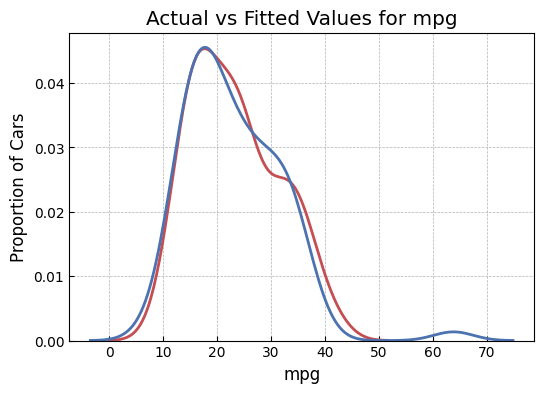

In [178]:
width = 6
height = 4
#plt.figure(figsize=(width, height))
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (6, 4),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})


y_hat=model2.predict(X_test)
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


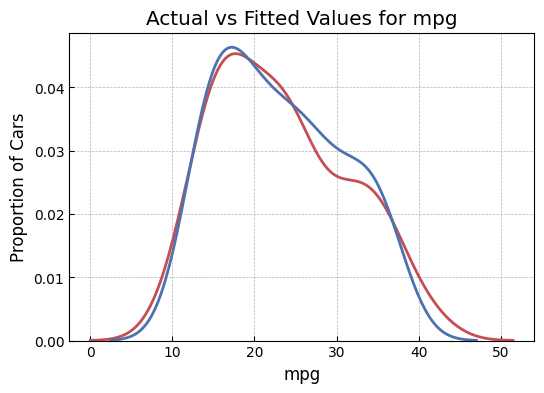

In [179]:

plt.figure(figsize=(width, height))

y_hat=model4.predict(X_test)
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


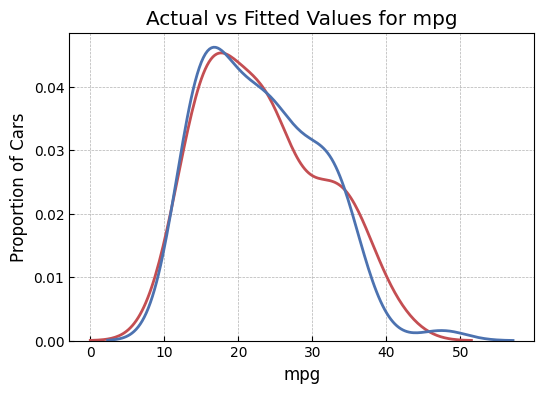

In [180]:

plt.figure(figsize=(width, height))

y_hat=model7.predict(X_test)
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## R squared measure:

In [154]:
print("R squared measure for polynomial Regressor:")
model2.score(X_test, y_test)

R squared measure for polynomial Regressor:


0.5424254426895425

In [155]:
print("R squared measure for Random Forest Regressor:")
model4.score(X_test, y_test)

R squared measure for Random Forest Regressor:


0.9619583663462005

In [156]:
print("R squared measure for Voting Regressor:")
model7.score(X_test, y_test)

R squared measure for Voting Regressor:


0.7998764336567066

### Cross Validation for the 3 models:

In [131]:
def display_scores(scores):
    print("mean square error scores: ", -scores)
    print("average mean square error:", -scores.mean())

#### polynomial regression

In [161]:
from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(model2, X_train, y_train, cv=10,
                         scoring='neg_mean_squared_error'
                         )
display_scores(scores_train)

mean square error scores:  [15.85476874 14.96066607 23.8433452  24.18553024 43.14216288  9.09780918
 33.9588087   4.84922316 12.50202769 32.82723071]
average mean square error: 21.522157255008132


In [162]:
scores_test= cross_val_score(model2, X_test, y_test, cv=10, scoring='neg_mean_squared_error')
display_scores(scores_test)

mean square error scores:  [483.91575135 104.5472521   20.83379288 122.5986468   77.44449634
 154.49804713  91.22243896  33.52737406  16.96612328 235.55162671]
average mean square error: 134.11055496209056


#### Random Forest

In [163]:
scores_train = cross_val_score(model4, X_train, y_train, cv=10,
                         scoring='neg_mean_squared_error'
                         )
display_scores(scores_train)

mean square error scores:  [ 4.87609636 12.75537278 10.50046512 15.20793171  7.80542361  4.81968283
  8.19396171  4.35154192  8.40492363  7.99424086]
average mean square error: 8.490964052145292


In [164]:
scores_test= cross_val_score(model4, X_test, y_test, cv=10, scoring='neg_mean_squared_error')
display_scores(scores_test)

mean square error scores:  [ 7.88054176  9.71147176  5.50772083 17.50645479  6.99952762 14.62174192
 15.64055515  9.48266242  3.57732474 13.62022329]
average mean square error: 10.45482242809183


#### Voting Regressor

In [166]:
scores_train = cross_val_score(model7, X_train, y_train, cv=10,
                         scoring='neg_mean_squared_error'
                         )
display_scores(scores_train)

mean square error scores:  [ 7.05420592  9.30714454 14.7085761  16.35949384 19.29077351  4.7173862
 14.99180755  3.28542984  6.90716775 10.23829822]
average mean square error: 10.686028347804875


In [167]:
scores_test= cross_val_score(model7, X_test, y_test, cv=10, scoring='neg_mean_squared_error')
display_scores(scores_test)

mean square error scores:  [138.54348938  27.95265465   8.18147455  32.3048577   23.14628803
  54.41623255  24.7898416   15.95220155   5.25688993  81.45943372]
average mean square error: 41.20033636779789


## Residuals plot for random forest:

In [175]:
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (6, 5),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})

<ipython-input-176-5080ecd3d994>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(y_hat,line, 'k--',color = 'r')


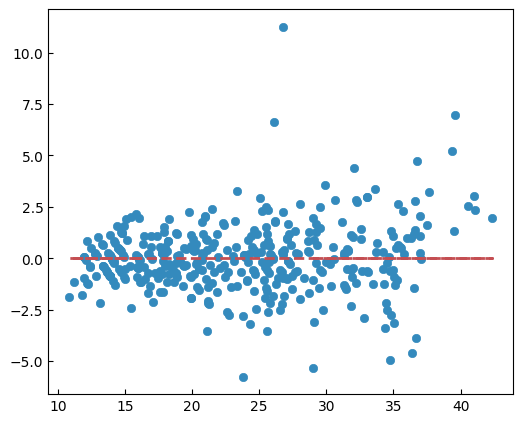

In [176]:

y_hat=model4.predict(X)
residuals= y-y_hat
#plt.figure(figsize=(5, 5))
plt.scatter(y_hat, residuals)
plt.grid(False)
line=[0] * len(y_hat)
plt.plot(y_hat,line, 'k--',color = 'r')
plt.rcParams['axes.facecolor'] = 'black'
plt.show()

### fitting the model on the whold dataset

In [96]:
model4.fit(X,y)

Pipeline(steps=[('tree',
                 RandomForestRegressor(min_samples_split=10, n_estimators=70))])